In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('epl-allseasons-matchstats.csv')

In [3]:
df.head(5)

,Season,Date,Referee,HomeTeam,AwayTeam,FullTime,Halftime,HomeGoals,HomeGoalsHalftime,HomeShots,...,HomeYellowCards,HomeRedCards,AwayGoals,AwayGoalsHalftime,AwayShots,AwayShotsOnTarget,AwayCorners,AwayFouls,AwayYellowCards,AwayRedCards
0,2010/11,2010-08-14,M Dean,Aston Villa,West Ham,HomeWin,HomeWin,3,2,23,...,1,0,0,0,12,2,7,15,2,0
1,2010/11,2010-08-14,P Dowd,Blackburn,Everton,HomeWin,HomeWin,1,1,7,...,2,0,0,0,17,12,3,14,1,0
2,2010/11,2010-08-14,S Attwell,Bolton,Fulham,Draw,Draw,0,0,13,...,1,0,0,0,12,7,8,13,3,0
3,2010/11,2010-08-14,M Clattenburg,Chelsea,West Brom,HomeWin,HomeWin,6,2,18,...,1,0,0,0,10,4,1,10,0,0
4,2010/11,2010-08-14,A Taylor,Sunderland,Birmingham,Draw,HomeWin,2,1,6,...,3,1,2,0,13,7,6,10,3,0


In [4]:
print(df.dtypes)

Season               object
Date                 object
Referee              object
HomeTeam             object
AwayTeam             object
FullTime             object
Halftime             object
HomeGoals             int64
HomeGoalsHalftime     int64
HomeShots             int64
HomeShotsOnTarget     int64
HomeCorners           int64
HomeFouls             int64
HomeYellowCards       int64
HomeRedCards          int64
AwayGoals             int64
AwayGoalsHalftime     int64
AwayShots             int64
AwayShotsOnTarget     int64
AwayCorners           int64
AwayFouls             int64
AwayYellowCards       int64
AwayRedCards          int64
dtype: object


In [5]:
df['Referee'].value_counts()

Referee
M Dean           288
M Atkinson       281
M Oliver         266
A Taylor         256
A Marriner       249
J Moss           225
K Friend         216
L Mason          215
M Clattenburg    175
M Jones          170
C Pawson         157
L Probert        137
N Swarbrick      132
P Dowd           130
H Webb           119
C Foy            109
S Attwell         95
R Madley          91
R East            91
P Tierney         80
G Scott           68
C Kavanagh        66
M Halsey          60
P Walton          42
D Coote           28
S Hooper          21
A Madley          13
P Bankes          11
K Stroud           3
l Mason            1
O Langford         1
T Robinson         1
R Jones            1
S Scott            1
D England          1
Name: count, dtype: int64

In [6]:
df['Halftime'].value_counts()

Halftime
Draw       1558
HomeWin    1307
AwayWin     935
Name: count, dtype: int64

In [7]:
df['FullTime'].value_counts()

FullTime
HomeWin    1737
AwayWin    1127
Draw        936
Name: count, dtype: int64

In [8]:
import scipy.stats as ss

In [9]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [10]:
HT_FT = cramers_v(df['FullTime'], df['Halftime'])

In [11]:
HT_FT

np.float64(0.46167787672161076)

In [12]:
half_time_full_time = df.groupby(['Halftime', 'FullTime']).size().unstack()

In [13]:
half_time_full_time

FullTime,AwayWin,Draw,HomeWin
Halftime,,,
AwayWin,662,179,94
Draw,401,575,582
HomeWin,64,182,1061


In [14]:
import seaborn as sns

<Axes: xlabel='Halftime'>

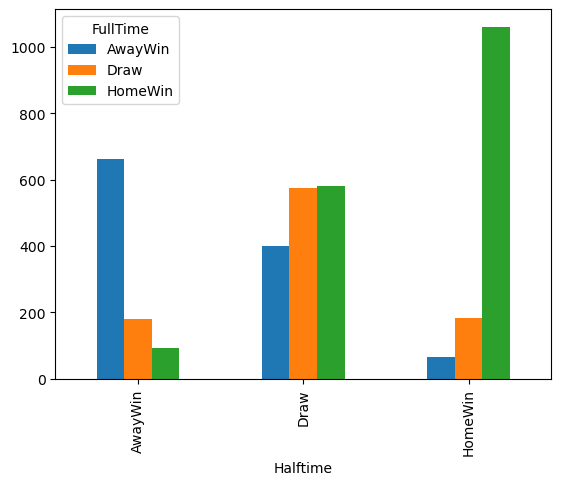

In [16]:
half_time_full_time.plot(kind = 'bar')

In [45]:
df[df['Halftime']!=df['FullTime']]

,Season,Date,Referee,HomeTeam,AwayTeam,FullTime,Halftime,HomeGoals,HomeGoalsHalftime,HomeShots,...,HomeYellowCards,HomeRedCards,AwayGoals,AwayGoalsHalftime,AwayShots,AwayShotsOnTarget,AwayCorners,AwayFouls,AwayYellowCards,AwayRedCards
4,2010/11,2010-08-14,A Taylor,Sunderland,Birmingham,Draw,HomeWin,2,1,6,...,3,1,2,0,13,7,6,10,3,0
11,2010/11,2010-08-21,M Oliver,Birmingham,Blackburn,HomeWin,Draw,2,0,10,...,2,0,1,0,7,2,12,14,3,0
12,2010/11,2010-08-21,L Mason,Everton,Wolves,Draw,HomeWin,1,1,14,...,1,0,1,0,9,4,3,15,2,0
14,2010/11,2010-08-21,K Friend,West Brom,Sunderland,HomeWin,Draw,1,0,11,...,2,0,0,0,10,4,6,12,2,0
15,2010/11,2010-08-21,A Marriner,West Ham,Bolton,AwayWin,Draw,1,0,17,...,2,0,3,0,12,8,5,18,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3791,2019/20,2020-07-26,J Moss,Burnley,Brighton,AwayWin,Draw,1,1,13,...,3,0,2,1,14,4,7,11,0,0
3793,2019/20,2020-07-26,A Marriner,Crystal Palace,Tottenham,Draw,AwayWin,1,0,13,...,3,0,1,1,7,2,2,13,2,0
3795,2019/20,2020-07-26,M Atkinson,Leicester,Man United,AwayWin,Draw,0,0,14,...,1,1,2,0,7,3,3,11,4,0
3797,2019/20,2020-07-26,A Taylor,Newcastle,Liverpool,AwayWin,Draw,1,1,3,...,1,0,3,1,14,6,4,5,0,0


In [23]:
df['AwayRedCards'].value_counts()

AwayRedCards
0    3502
1     287
2      11
Name: count, dtype: int64

In [24]:
df['HomeGoals'].value_counts()

HomeGoals
1    1220
2     944
0     854
3     485
4     194
5      71
6      23
7       5
8       4
Name: count, dtype: int64

In [26]:
df_down = df[['AwayRedCards', 'HomeGoals']]

In [27]:
df_down.head()

,AwayRedCards,HomeGoals
0,0,3
1,0,1
2,0,0
3,0,6
4,0,2


In [28]:
df_down.corr()

,AwayRedCards,HomeGoals
AwayRedCards,1.000000,0.071635
HomeGoals,0.071635,1.000000


<Axes: >

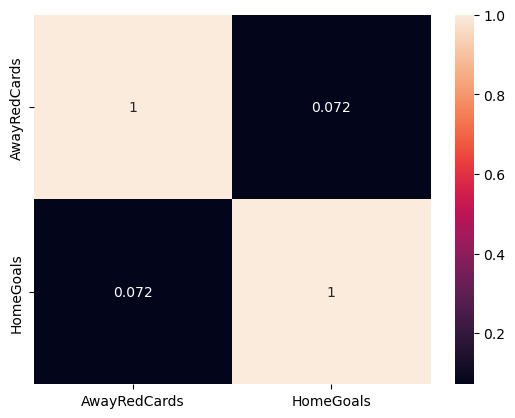

In [29]:
sns.heatmap(df_down.corr(), annot = True)

In [36]:
away_red_cards_home_goals = df.groupby(['AwayRedCards', 'HomeGoals']).size().unstack()

In [37]:
away_red_cards_home_goals

HomeGoals,0,1,2,3,4,5,6,7,8
AwayRedCards,,,,,,,,,
0,808.0,1125.0,870.0,441.0,172.0,59.0,20.0,4.0,3.0
1,46.0,91.0,70.0,43.0,21.0,11.0,3.0,1.0,1.0
2,NaN,4.0,4.0,1.0,1.0,1.0,NaN,NaN,NaN


<Axes: xlabel='AwayRedCards', ylabel='HomeGoals'>

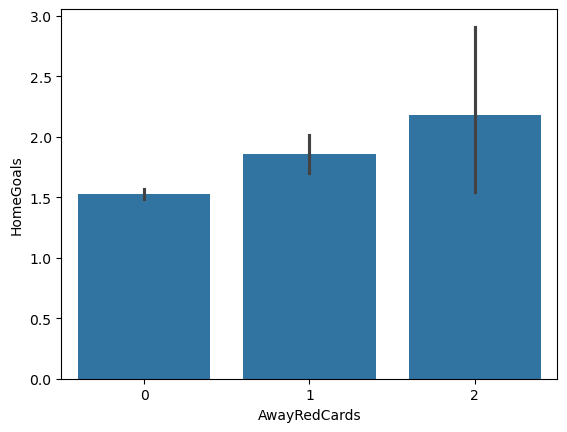

In [44]:
sns.barplot(data=df, x='AwayRedCards', y='HomeGoals')

In [30]:
df.describe()

,HomeGoals,HomeGoalsHalftime,HomeShots,HomeShotsOnTarget,HomeCorners,HomeFouls,HomeYellowCards,HomeRedCards,AwayGoals,AwayGoalsHalftime,AwayShots,AwayShotsOnTarget,AwayCorners,AwayFouls,AwayYellowCards,AwayRedCards
count,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000
mean,1.552368,0.687105,14.141316,5.697632,5.984474,10.503158,1.498684,0.059211,1.193158,0.530263,11.297632,4.570789,4.770000,10.976579,1.760789,0.081316
std,1.299116,0.844749,5.522862,3.317283,3.142994,3.380960,1.205846,0.243730,1.167948,0.741455,4.760613,2.806423,2.744684,3.530819,1.273741,0.283750
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,0.000000,10.000000,3.000000,4.000000,8.000000,1.000000,0.000000,0.000000,0.000000,8.000000,3.000000,3.000000,9.000000,1.000000,0.000000
50%,1.000000,0.000000,14.000000,5.000000,6.000000,10.000000,1.000000,0.000000,1.000000,0.000000,11.000000,4.000000,4.000000,11.000000,2.000000,0.000000
75%,2.000000,1.000000,17.000000,8.000000,8.000000,13.000000,2.000000,0.000000,2.000000,1.000000,14.000000,6.000000,6.000000,13.000000,3.000000,0.000000
max,8.000000,5.000000,43.000000,24.000000,19.000000,24.000000,7.000000,2.000000,9.000000,5.000000,30.000000,20.000000,19.000000,26.000000,9.000000,2.000000
